<a href="https://colab.research.google.com/github/chalapathi444/algorithms-in-tensorflow/blob/master/circle_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

**importing all data sets** 

In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

**creating artificial data**

In [159]:
from sklearn.datasets import make_circles
X,y = make_circles(n_samples = 3000, noise = 0.08, factor=0.3)
y = y.reshape(-1,1)
print(X.shape)
print(y.shape)

(3000, 2)
(3000, 1)


**spliting data into training data and testing data**

In [0]:

total_data_set  = tf.data.Dataset.from_tensor_slices((X,y))
train_data = total_data_set.take(2500)
total_data_set = total_data_set.skip(2500)
validation_data = total_data_set.take(500)


In [0]:
temp = list(train_data.as_numpy_iterator())
temp = list(zip(*temp))
X0 = np.array(temp[0])
Y0 = np.array(temp[1])
pos = Y0[:,0] == 1
neg = Y0[:,0] == 0
temp = list(validation_data.as_numpy_iterator())
temp = list(zip(*temp))
X1 = np.array(temp[0])
Y1 = np.array(temp[1])
pos1 = Y1[:,0] == 1
neg1 = Y1[:,0] == 0

**visualizing the data**

Text(0.5, 1.0, 'the data ')

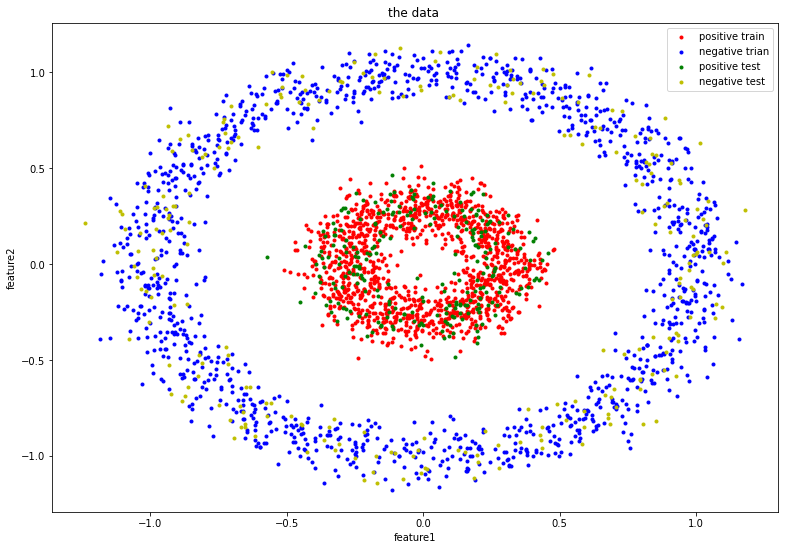

In [162]:
plt.figure(figsize=(13,9))
plt.scatter(X0[pos,0],X0[pos,1],marker = ".",label = 'positive train',color = 'r')
plt.scatter(X0[neg,0],X0[neg,1],marker = ".",label = 'negative trian',color = 'b')
plt.scatter(X1[pos1,0],X1[pos1,1],marker = ".",label = 'positive test',color = 'g')
plt.scatter(X1[neg1,0],X1[neg1,1],marker = ".",label = 'negative test',color = 'y')
plt.legend()
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.title("the data ")

**Building model**

In [0]:
# create a model
def create_model():
    model = tf.keras.Sequential()
    # Input layer
    model.add(tf.keras.layers.Dense(8,input_shape =(2,),kernel_initializer='uniform', activation='relu'))
    # Output layer
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compile a model
    model.compile(loss='binary_crossentropy', 
                optimizer=tf.keras.optimizers.Adam(0.01), 
                metrics=['accuracy'])
    return model

In [0]:
model = create_model()

In [165]:
print(train_data)
train_data_batch = train_data.batch(500)
print(train_data_batch)
validation_data_batc = validation_data.batch(500)
print(validation_data_batc)

<TakeDataset shapes: ((2,), (1,)), types: (tf.float64, tf.int64)>
<BatchDataset shapes: ((None, 2), (None, 1)), types: (tf.float64, tf.int64)>
<BatchDataset shapes: ((None, 2), (None, 1)), types: (tf.float64, tf.int64)>


In [166]:
result = model.fit(train_data_batch,validation_data = validation_data_batc, epochs = 100)

Epoch 1/100
5/5 [==============================] - 0s 16ms/step - loss: 0.6889 - accuracy: 0.5300 - val_loss: 0.6847 - val_accuracy: 0.7040
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6819 - accuracy: 0.7428 - val_loss: 0.6773 - val_accuracy: 0.8620
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6739 - accuracy: 0.8908 - val_loss: 0.6692 - val_accuracy: 0.8700
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.6651 - accuracy: 0.8744 - val_loss: 0.6600 - val_accuracy: 0.8460
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.6551 - accuracy: 0.8748 - val_loss: 0.6491 - val_accuracy: 0.8760
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.6435 - accuracy: 0.9176 - val_loss: 0.6366 - val_accuracy: 0.9240
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6302 - accuracy: 0.9388 - val_loss: 0.6224 - val_accuracy: 0.9460
Epoch 8/100
5/5 [=========

In [167]:
(loss,accuracy) = model.evaluate(train_data.batch(2500))
print("Traing acurray and loss is ",loss," ",accuracy)
(loss,accuracy) = model.evaluate(validation_data.batch(500))
print("validation accuracy and loss is ",loss," ",accuracy)

1/1 [==============================] - 0s 1ms/step - loss: 0.0166 - accuracy: 1.0000
Traing acurray and loss is  0.01656302623450756   1.0
1/1 [==============================] - 0s 1ms/step - loss: 0.0180 - accuracy: 1.0000
validation accuracy and loss is  0.018040984869003296   1.0


**Visualizing test train accuracies**

Text(0.5, 1.0, 'model accuracy')

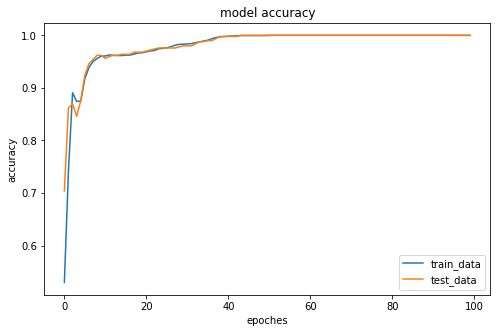

In [168]:
plt.figure(figsize = (8,5))
plt.plot(result.history['accuracy'],label = 'train_data')
plt.plot(result.history['val_accuracy'],label = 'test_data')
plt.xlabel('epoches')
plt.ylabel('accuracy')
plt.legend()
plt.title("model accuracy")

Text(0.5, 1.0, 'model loss')

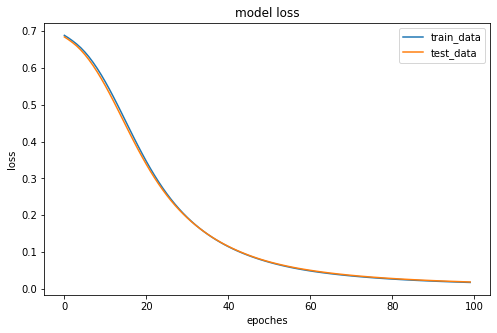

In [169]:
plt.figure(figsize = (8,5))
plt.plot(result.history['loss'],label = 'train_data')
plt.plot(result.history['val_loss'],label = 'test_data')
plt.xlabel('epoches')
plt.ylabel('loss')
plt.legend()
plt.title("model loss")

**visualzing preditions and test data**

In [0]:
temp = list(validation_data.as_numpy_iterator())
temp = list(zip(*temp))
X1 = np.array(temp[0])
Y1 = np.array(temp[1])
pos1 = Y1[:,0] == 1
neg1 = Y1[:,0] == 0

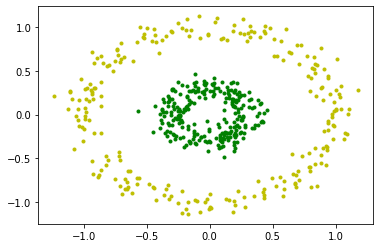

In [171]:
plt.scatter(X1[pos1,0],X1[pos1,1],marker = ".",label = 'positive test',color = 'g')
plt.scatter(X1[neg1,0],X1[neg1,1],marker = ".",label = 'negative test',color = 'y')

In [0]:
predictions = model.predict(validation_data.batch(500))

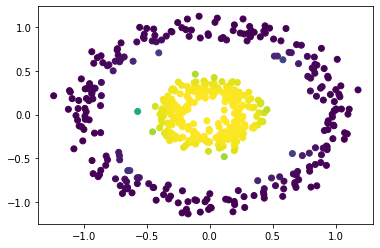

In [173]:
plt.scatter(X1[:,0],X1[:,1],c = predictions[:,0])

**giving weights of model**

In [174]:
weights0 = model.layers[0].get_weights()[0]
biases0 = model.layers[0].get_weights()[1]
print("Input layer weights",weights0.shape,":\n",weights0)
print("Input layer biases",biases0.shape,":\n",biases0)

weights1 = model.layers[1].get_weights()[0]
biases1 = model.layers[1].get_weights()[1]
print("\nOutput layer weights",weights1.shape,":\n",weights1)
print("Output layer biases",biases1.shape,":\n",biases1)

Input layer weights (2, 8) :
 [[-2.779504    0.5600354   3.3964608   0.41813248  0.49451348  1.6877729
   0.62858987  0.4131267 ]
 [-1.6768582  -0.56868505 -3.3469145  -0.4638655  -0.52375686  3.2146072
  -0.5872033  -0.444366  ]]
Input layer biases (8,) :
 [-0.05624075  1.0439494  -0.03860471  0.80526024  0.9371273  -0.05834323
  1.1511003   0.77868605]

Output layer weights (8, 1) :
 [[-3.810146 ]
 [ 1.6638116]
 [-4.128708 ]
 [ 2.0610738]
 [ 1.7278845]
 [-3.3567646]
 [ 1.5662199]
 [ 2.1427832]]
Output layer biases (1,) :
 [0.2651438]


**let us see what one of neuron in the system doing**

In [0]:
def relu(z):
  return np.maximum(0,z)
def sigmoid(z):
  return (1./(1+np.exp(-z)))

In [0]:
x0 = np.linspace(-2,2,50)
x1 = np.linspace(-2,2,50)
q = []
l = []
k = []
for i in x0:
  for j in x1:
    q.append(i)
    l.append(j)
    temp = [i,j]
    k.append(temp)


In [214]:
total_vector = np.array(k)
print(total_vector.shape)

(2500, 2)


In [215]:
temp1 = weights0[:,0].reshape(2,1)
print(temp1.shape)

(2, 1)


In [0]:
temp2  = weights1[0,0]

In [217]:
z1 = total_vector@temp1 + biases0[0]
print(z1.shape)

(2500, 1)


In [218]:
a1 = relu(z1)
print(a1.shape)

(2500, 1)


In [0]:
z2 = a1*temp2 + biases1[0]
a2 = sigmoid(z2)



In [0]:
new_list = []
for i in range(2500):
  if(a2[i][0] <0.5):
    new_list.append(0)
  else:
    new_list.append(1)
new_list = np.array(new_list)

In [0]:
q = np.array(q)
l = np.array(l)

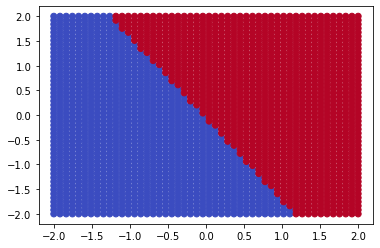

In [222]:
from matplotlib import cm
plt.scatter(q,l,c = new_list,cmap=cm.coolwarm)